In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.cm  as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import plot_recipes as pr

In [2]:
speed = {}
direction = {}
temperature = {}

for y in range(2011,2020):
    if y == 2013:
        continue
        
    with Dataset(f'../netcdf/{y}/aquadopp.nc', 'r') as nc:
        #print(nc.variables)
        speed[y] = np.array(nc['HCSP'][:])
        direction[y] = np.array(nc['HCDT'][:])*np.pi/180
        temperature[y] = np.array(nc['TEMP'][:])

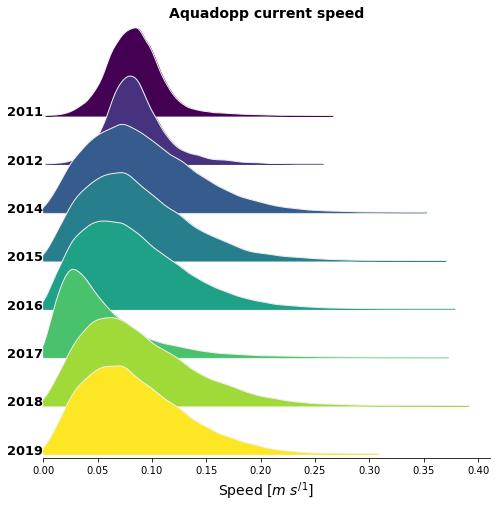

In [3]:
pr.ridge_plot(speed,
              xlabel=r'Speed [$m \ s^{/1}$]',
              title='Aquadopp current speed',
              cmap='viridis');

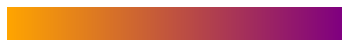

In [4]:
Opurple = pr.custom_cmap(['orange', 'purple'])
pr.display_cmap(Opurple)

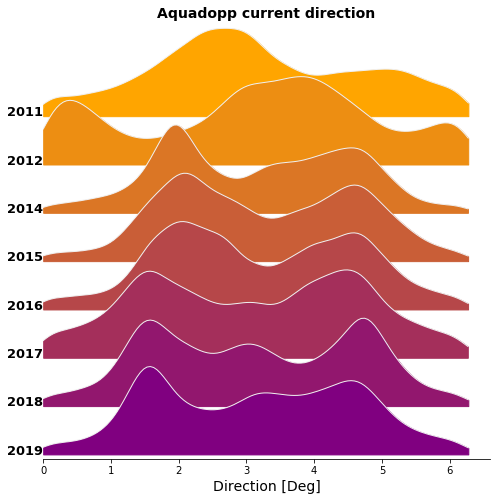

In [5]:
pr.ridge_plot(direction,
                 xlabel='Direction [Deg]',
                 title='Aquadopp current direction',
                 cmap=Opurple);

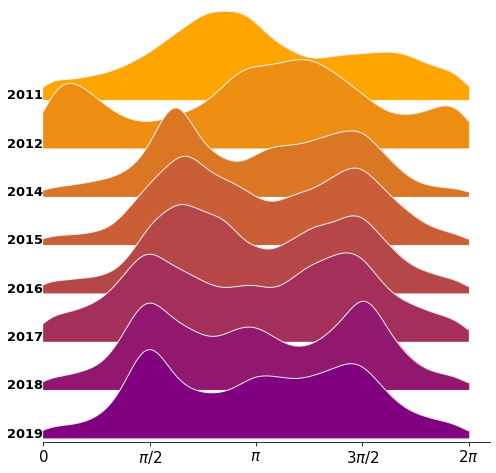

In [11]:
#direction[2012] = np.mod(direction[2012]+np.pi/2, np.pi*2)

fig, ax = pr.ridge_plot(direction,
                 xlabel='Direction [Deg]',
                 cmap=Opurple);
ax[-1].set_xlabel('')
ax[-1].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
# ax[-1].set_xticklabels(['East($0$)', 'North ($\pi / 2$)', 'West ($\pi$)', 'South ($3 \pi / 2$)', 'East($2\pi$)'],
#                       fontsize=13)
ax[-1].set_xticklabels(['$0$', '$\pi / 2$', '$\pi$', '$3 \pi / 2$', '$2\pi$'], fontsize=15)
plt.savefig('../figures/report_figures/aquadopp/Direction_dist', facecolor=(1,0,0,0))

In [9]:
y = 2015
reference = direction[y]
data = speed[y]
bins = np.linspace(0, 2*np.pi, 181)
digitized = np.digitize(reference, bins)
bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]

Text(0, 0.5, 'Speed (m/s)')

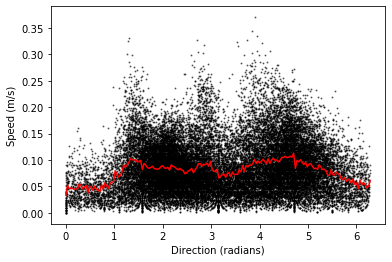

In [10]:
plt.scatter(direction[y], speed[y], c='k', alpha=0.5, s=1)
plt.plot(np.linspace(0, 2*np.pi, 180), bin_means, c='r')
plt.xlabel('Direction (radians)')
plt.ylabel('Speed (m/s)')

Text(0.98, 0.5, 'Normalized distritution')

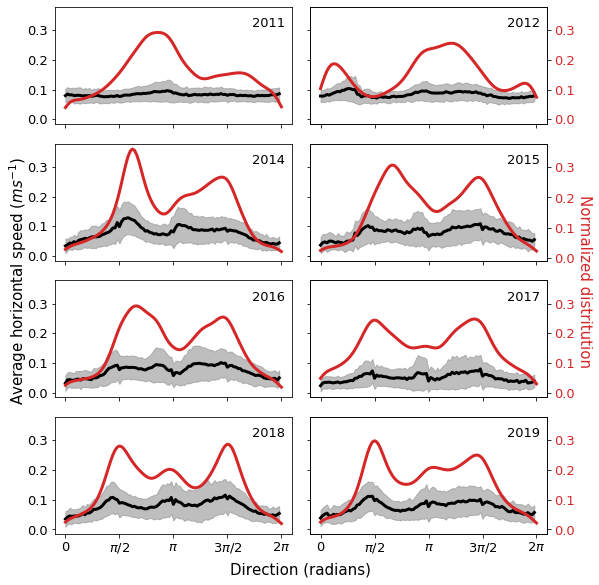

In [25]:
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(4, 2, sharex=True, sharey= True, figsize = (8,8))
axes = axes.reshape(8)

for j, y in enumerate(direction.keys()):
    
    reference = direction[y]
    data = speed[y]
    bins = np.linspace(0, 2*np.pi, 101)
    digitized = np.digitize(reference, bins)
    bin_means = np.array([data[digitized == i].mean() for i in range(1, len(bins))])
    bin_std = np.array([data[digitized == i].std() for i in range(1, len(bins))])
    
    
    kernel = stats.gaussian_kde(reference[~np.isnan(reference)])
    kde = kernel(bins)   
    
    #axes[j].hist(reference, bins, density=True, color='tab:red', alpha=0.5)
    axes[j].fill_between(bins[:-1], bin_means, bin_means + bin_std, color='tab:grey', alpha=0.5)
    axes[j].fill_between(bins[:-1], bin_means, bin_means - bin_std, color='tab:grey', alpha=0.5)
    #axes[j].plot(bins, kde, c='tab:red', lw=2)
    axes[j].plot(bins[:-1], bin_means, c='k', lw=3)
    axes[j].text(5.9, 0.31, y, ha='center', fontsize = 13)
    axes[j].plot(bins, kde, c='tab:red', lw=3)
    
    if y in [2015,2017, 2019]:
        ax_aux = axes[j].twinx()
        ax_aux.set_ylim(axes[-1].get_ylim())
        ax_aux.tick_params(axis='y', labelcolor='tab:red')

ax_aux = axes[1].twinx()
ax_aux.set_ylim(axes[-1].get_ylim())
ax_aux.tick_params(axis='y', labelcolor='tab:red')

axes[-1].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axes[-1].set_xticklabels(['$0$', '$\pi / 2$', '$\pi$', '$3 \pi / 2$', '$2\pi$'])

plt.tight_layout()
fig.text(0.5, -0.01, 'Direction (radians)', ha='center', fontsize = 15)
fig.text(-0.01, 0.5, 'Average horizontal speed ($m s^{-1}$)', va='center', rotation='vertical', fontsize = 15)
fig.text(0.98, 0.5, 'Normalized distritution', va='center', rotation=270, fontsize = 15, color='tab:red')
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('../figures/report_figures/aquadopp/Speed_Direction_dist')

[Text(0, 0, 'East($0$)'),
 Text(0, 0, 'North ($\\pi / 2$)'),
 Text(0, 0, 'West ($\\pi$)'),
 Text(0, 0, 'South ($3 \\pi / 2$)'),
 Text(0, 0, 'East($2\\pi$)')]

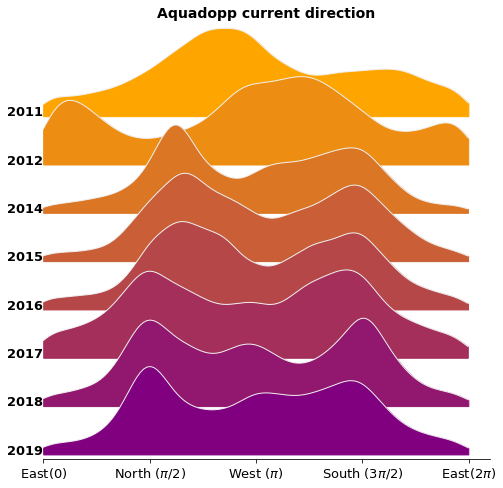

In [30]:
fig, ax = pr.ridge_plot(direction,
                 xlabel='Direction [Deg]',
                 title='Aquadopp current direction',
                 cmap=Opurple)
ax[-1].set_xlabel('')
ax[-1].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[-1].set_xticklabels(['East($0$)', 'North ($\pi / 2$)', 'West ($\pi$)', 'South ($3 \pi / 2$)', 'East($2\pi$)'],
                      fontsize=13)

In [ ]:
plt.polar

In [28]:
def estimate_maxima(data):
    kde = gaussian_kde(data)
    no_samples = 10
    samples = np.linspace(0, 10, no_samples)
    probs = kde.evaluate(samples)
    maxima_index = probs.argmax()
    maxima = samples[maxima_index]

    return maxima

In [ ]:
kde stats

In [29]:
stats.guausian_kde

AttributeError: module 'scipy.stats' has no attribute 'guausian_kde'

> OBS: how is oriented the instrument? Where is the North in for the instrument? It might be useful to see the different placement of the mooring compared with this plot.

In [7]:
blured = pr.custom_cmap(['blue', 'red'])

(<Figure size 576x576 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6a91fa898>,
       dtype=object))

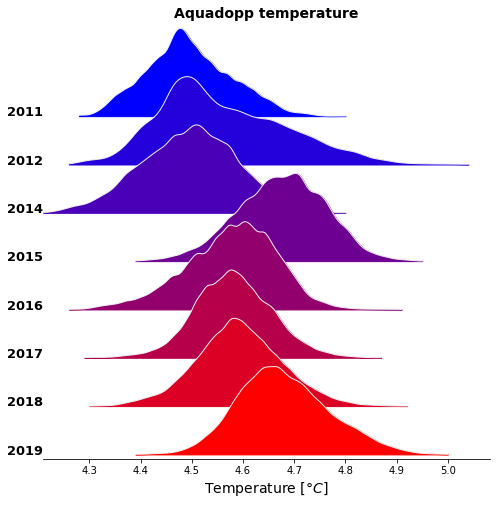

In [8]:
pr.ridge_plot(temperature,
              xlabel=r'Temperature [$\degree C$]',
              title='Aquadopp temperature',
              cmap=blured)

> Why is 2015 deviated? Is it related to mooring position? 2019 appears to be warmer on average than the rest of the years.

# Fourier decomposition 

In [9]:
temperature[2011]

array([4.56, 4.54, 4.53, ..., 4.34, 4.34, 4.46], dtype=float32)

In [10]:
temp_fft = np.fft.rfft(temperature[2011])

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


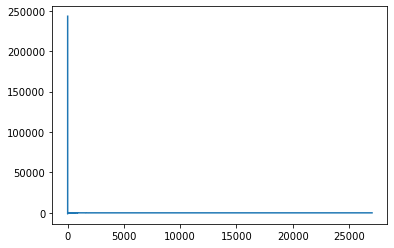

In [14]:
plt.plot(temp_fft)